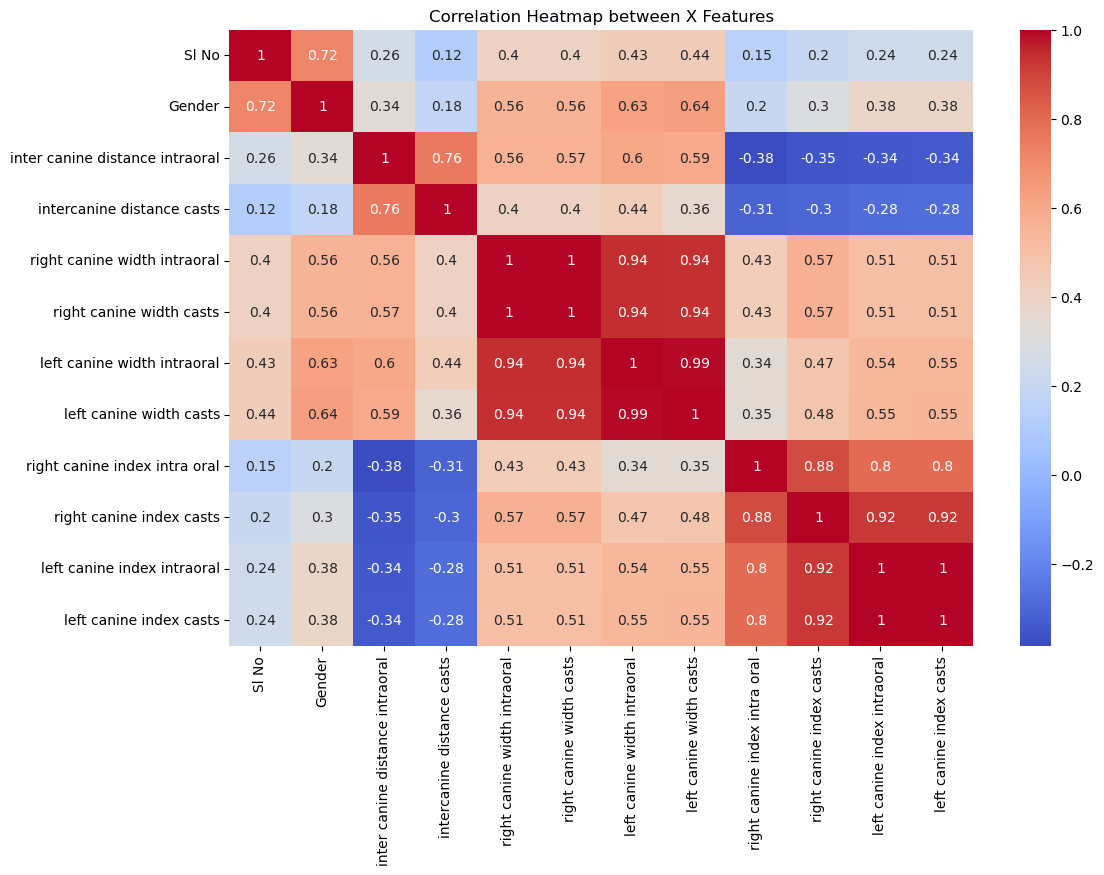

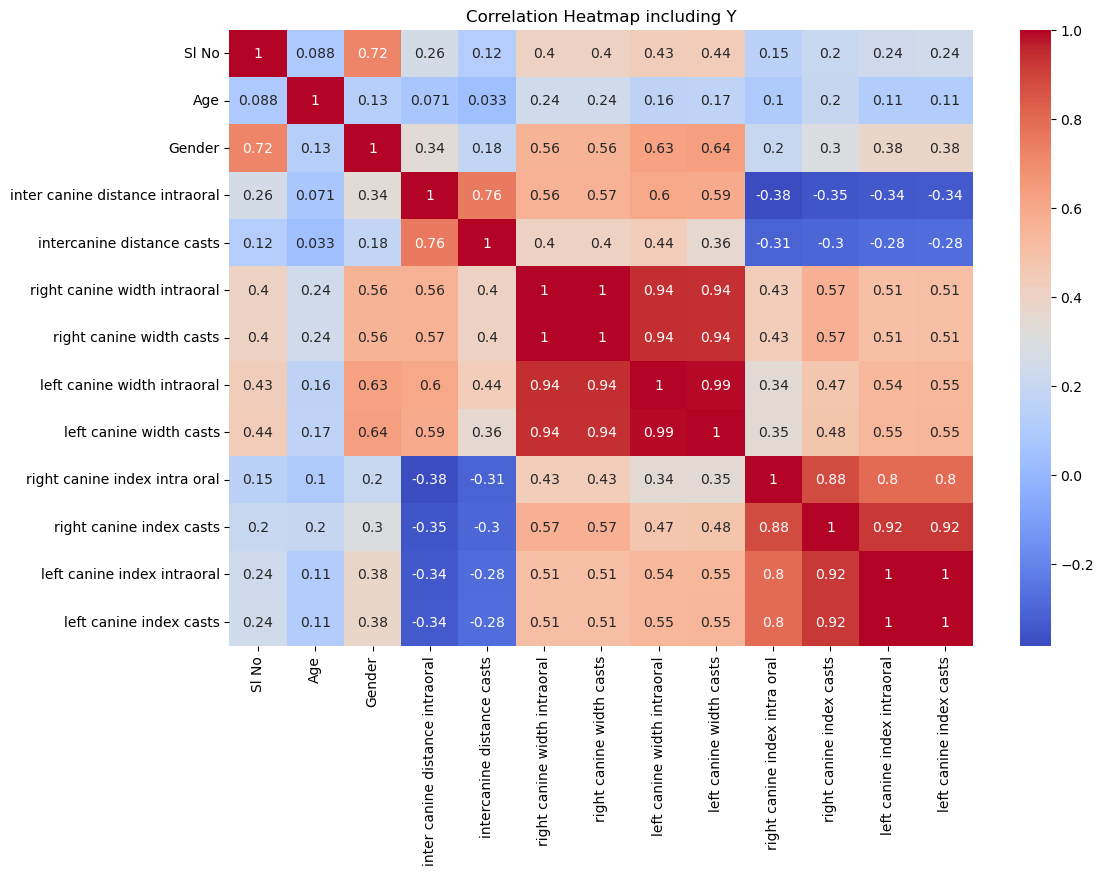

Logistic Regression - MSE: 6.336363636363636, R²: -0.5295836886967018
Decision Tree Regressor - MSE: 3.1272727272727274, R²: 0.24508351662601813
Random Forest Regressor - MSE: 1.5791036363636362, R²: 0.6188079940548332
XGBoost Regressor - MSE: 1.4429504504593007, R²: 0.6516750617098831


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, roc_auc_score


# Load and preprocess dataset
data = pd.read_csv('Dentistry Dataset.csv')
dataset = pd.DataFrame(data)

# Drop 'Sample ID' if it exists
if 'Sample ID' in dataset.columns:
    dataset.drop(columns=['Sample ID'], inplace=True)

# Encode 'Gender' column
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# Split independent and dependent variables
X = dataset.drop(columns=['Age'])
y = dataset['Age']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Compute the correlation matrix
corr_matrix = X_normalized_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between X Features')
plt.show()

# Compute the correlation matrix including the target variable
corr_matrix_with_y = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_with_y, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap including Y')
plt.show()

# Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')  # Increase max_iter and change solver to 'liblinear'
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()

# Train and evaluate models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree Regressor": tree_reg,
    "Random Forest Regressor": forest_reg,
    "XGBoost Regressor": xgb_reg
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R²: {r2}")



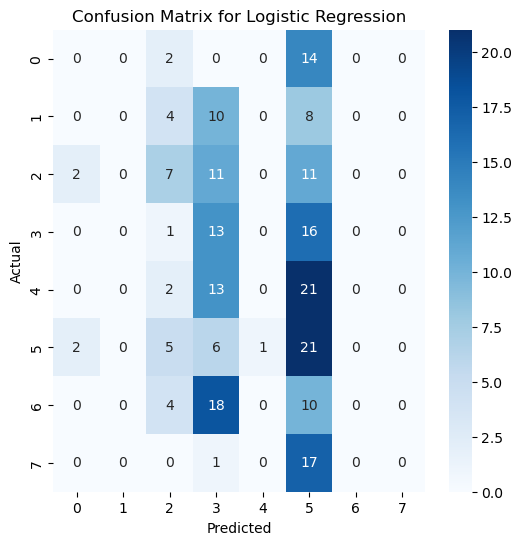

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00        16
          19       1.00      0.00      0.00        22
          20       0.28      0.23      0.25        31
          21       0.18      0.43      0.25        30
          22       0.00      0.00      0.00        36
          23       0.18      0.60      0.27        35
          24       1.00      0.00      0.00        32
          25       1.00      0.00      0.00        18

    accuracy                           0.19       220
   macro avg       0.45      0.16      0.10       220
weighted avg       0.42      0.19      0.11       220



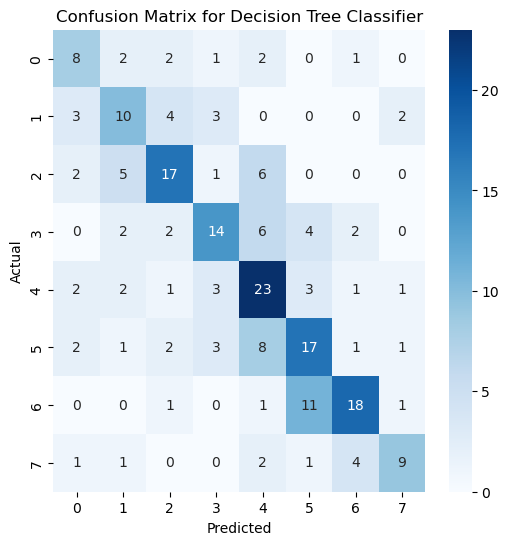

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

          18       0.44      0.50      0.47        16
          19       0.43      0.45      0.44        22
          20       0.59      0.55      0.57        31
          21       0.56      0.47      0.51        30
          22       0.48      0.64      0.55        36
          23       0.47      0.49      0.48        35
          24       0.67      0.56      0.61        32
          25       0.64      0.50      0.56        18

    accuracy                           0.53       220
   macro avg       0.54      0.52      0.52       220
weighted avg       0.54      0.53      0.53       220



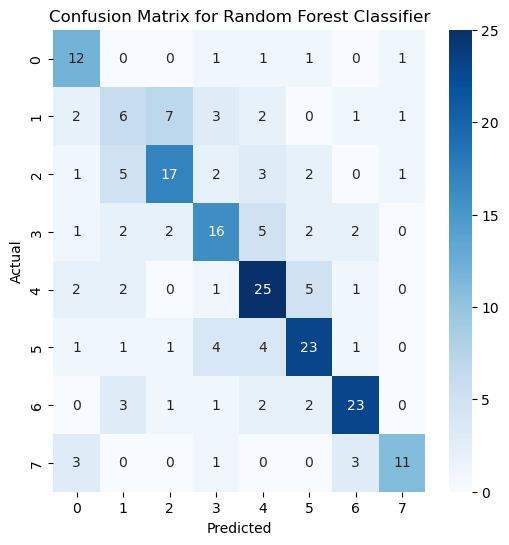

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

          18       0.55      0.75      0.63        16
          19       0.32      0.27      0.29        22
          20       0.61      0.55      0.58        31
          21       0.55      0.53      0.54        30
          22       0.60      0.69      0.64        36
          23       0.66      0.66      0.66        35
          24       0.74      0.72      0.73        32
          25       0.79      0.61      0.69        18

    accuracy                           0.60       220
   macro avg       0.60      0.60      0.59       220
weighted avg       0.61      0.60      0.60       220

XGBoost Regressor - MSE: 1.4429504504593007, R²: 0.6516750617098831


In [25]:
from sklearn.metrics import classification_report

# Define a function to evaluate and plot metrics
def evaluate_model(model, X_test, y_test, model_name):
    # Check if the model is a regressor or classifier
    is_classifier = hasattr(model, 'predict_proba')

    if is_classifier:
        # Confusion Matrix
        plt.figure(figsize=(6, 6))
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Classification Report
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred, zero_division=1))  # Set zero_division=1 here
    else:
        # Regression case
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} - MSE: {mse}, R²: {r2}")

# Example of how to evaluate each model:
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(tree_clf, X_test, y_test, "Decision Tree Classifier")
evaluate_model(forest_clf, X_test, y_test, "Random Forest Classifier")
evaluate_model(xgb_reg, X_test, y_test, "XGBoost Regressor")
